<img src="https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/INSAID_Full%20Logo.png" width="240" height="360" />
# ASSIGNMENT - DATA VISUALIZATION

In [1]:
import pandas as pd
pokemon = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/Pokemon.csv", index_col=0)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## UNIVARIATE PLOTTING

### 1. Create a bar chart using "Type 1" and its frequency.

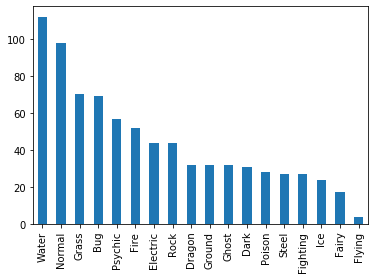

In [4]:
import pandas as pd
def create():
    pokemon['Type 1'].value_counts().plot.bar()
    return None
create()

### 2. Create a line chart using "HP" and its frequency.

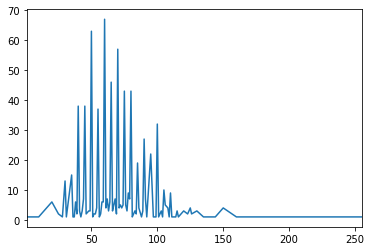

In [5]:
import pandas as pd
def create():
    pokemon['HP'].value_counts().sort_index().plot.line()
    return None
create()

### 3. Create an area chart using "Total" and its frequency.

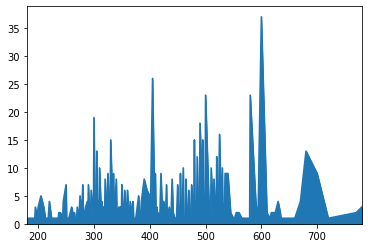

In [6]:
import pandas as pd
def create():
    pokemon['Total'].value_counts().sort_index().plot.area()
    return None
create()    

### 4. Create a histogram using "Total" and its frequency.

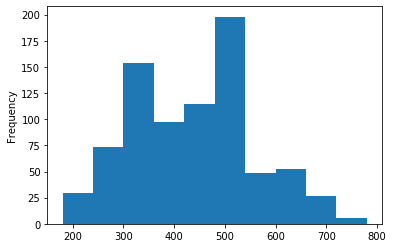

In [7]:
import pandas as pd
def create():
    pokemon['Total'].plot.hist()
    return None
create()

## BIVARIATE PLOTTING

### 5. Create a scatter plot using "Attack" and "Defense".

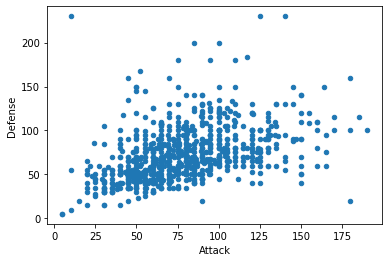

In [8]:
import pandas as pd
def create():
    pokemon.plot.scatter(x='Attack', y='Defense')
    return None
create()

### 6. Create a hex plot using "Attack" and "Defense" with gridsize of 25.

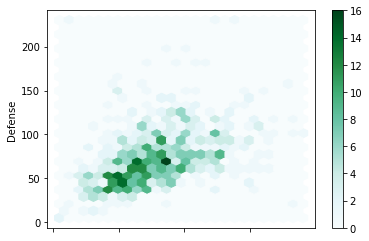

In [9]:
import pandas as pd
def create():
    pokemon.plot.hexbin(x='Attack', y='Defense', gridsize=25)
    return None
create()

### 7. Create a stacked chart on "Legendary" and "Generation" columns, for stacking on "Attack" and "Defense" values

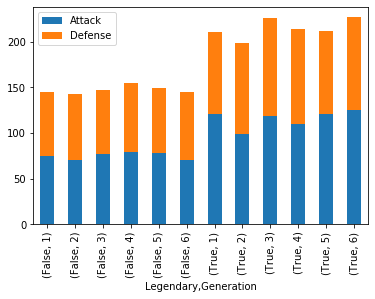

In [10]:
import pandas as pd
def create():
    pokemon_stats_legendary = pokemon.groupby(['Legendary', 'Generation']).mean()[['Attack', 'Defense']]
    pokemon_stats_legendary.plot.bar(stacked=True)
    return None
create()

### 8. Create a bivariate plot line on "HP", "Attack", "Defense", "Sp.Atk", "Sp.Def", "Speed", grouped by "Generation".

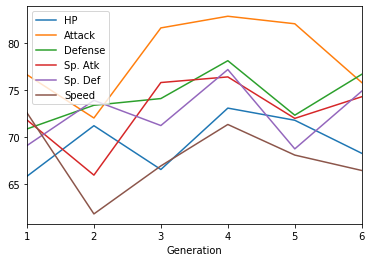

In [11]:
import pandas as pd
def create():
    pokemon_stats_by_generation = pokemon.groupby('Generation').mean()[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
    pokemon_stats_by_generation.plot.line()
    return None
create()

### 9. Create a pairplot dropping "Name" and using "Legendary" as hue and implement a palette of your choice(size=2).

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


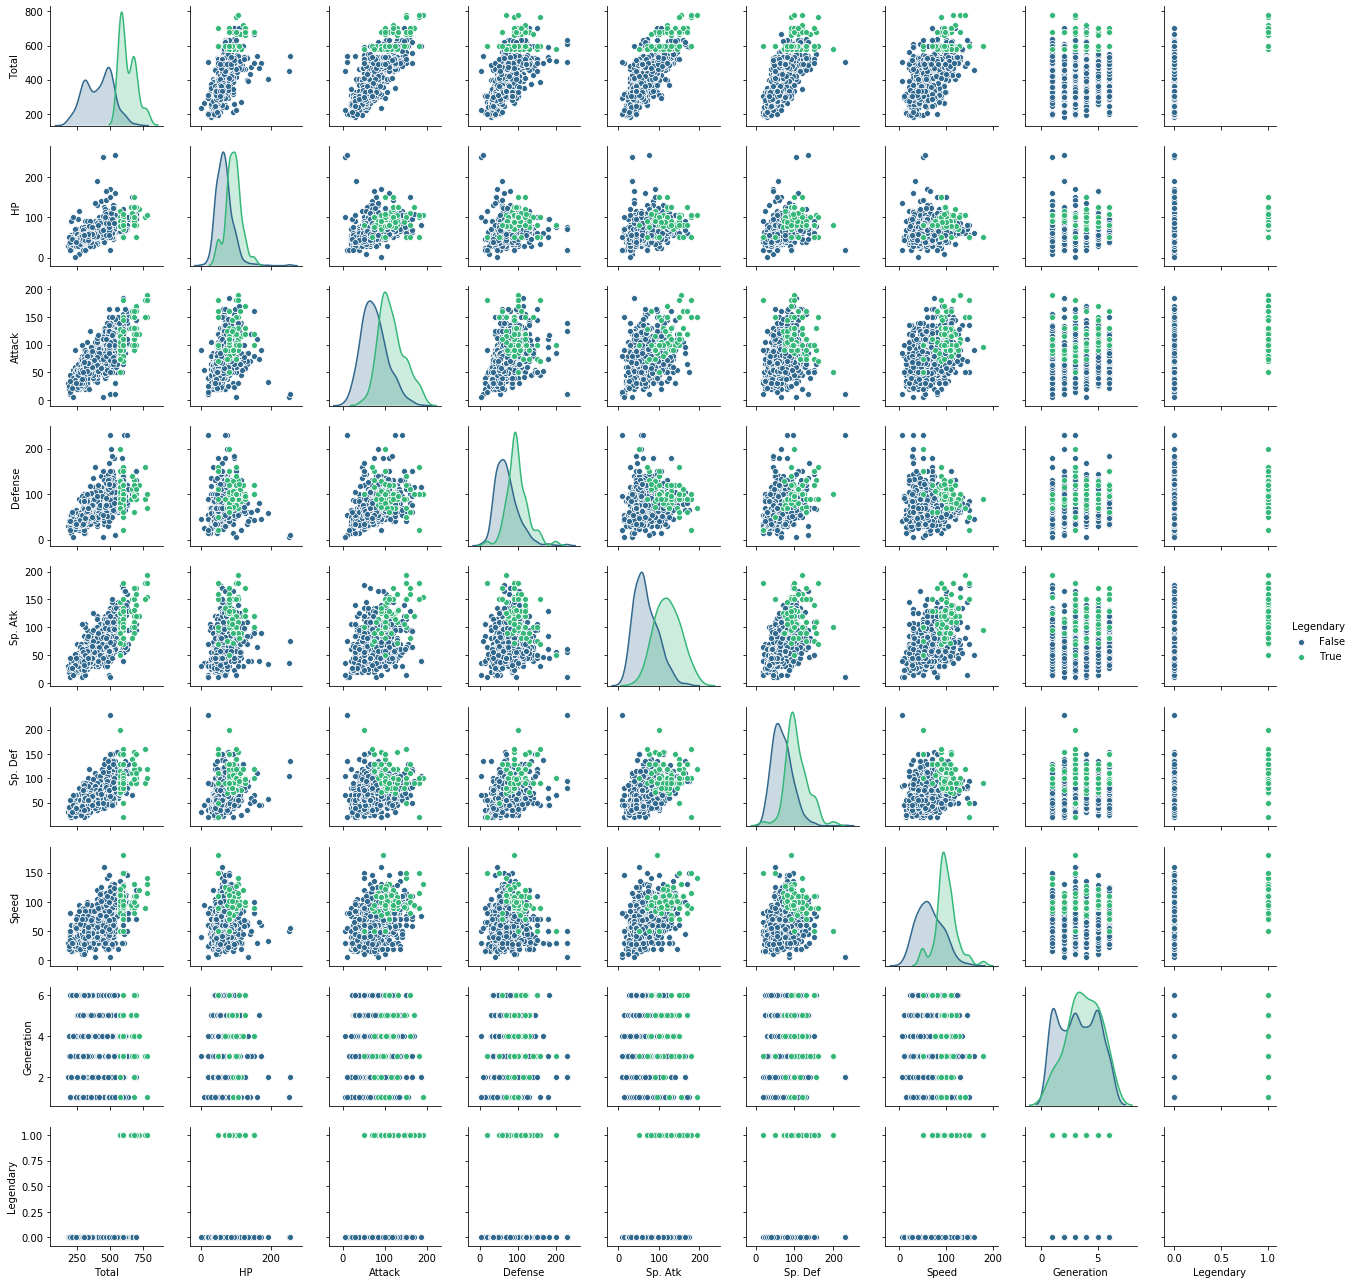

In [12]:
import seaborn as sns
def create():
    sns.pairplot(pokemon.drop("Name", axis=1), hue="Legendary",palette="viridis", size=2)
    return None
create()

## MULTIVARIATE PLOTTING

### 10. Create a multivariate scatter plot using "Attack" and "Defense" having hue as "Legendary" and appropriate markers as 'x' and 'o'.

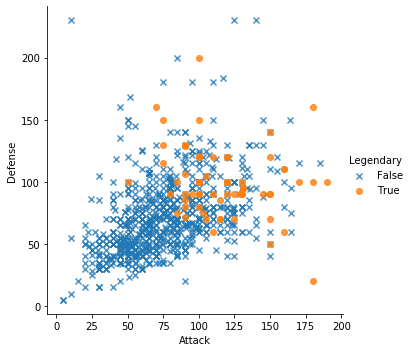

In [13]:
import seaborn as sns
def create():
    sns.lmplot(x='Attack', y='Defense', hue='Legendary', markers=['x', 'o'],fit_reg=False, data=pokemon)
    return None
create()

### 11. Create a box plot using "Generation" and "Total" with hue as "Legendary".

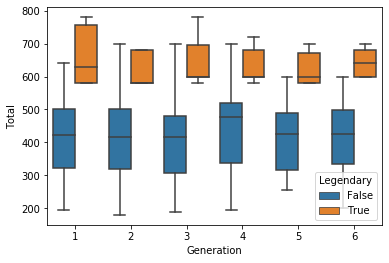

In [14]:
import seaborn as sns
def create():
    sns.boxplot(x="Generation", y="Total", hue='Legendary', data=pokemon)
    return None
create()

### 12. Create a heatmap using "HP", "Attack", "Sp. Atk", "Defense", "Sp. Def", "Speed" .

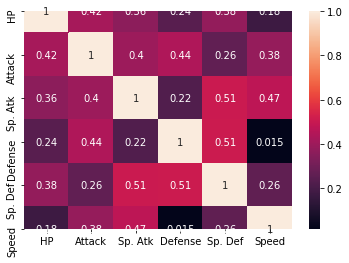

In [15]:
import seaborn as sns
def create():
    sns.heatmap(pokemon.loc[:, ['HP', 'Attack', 'Sp. Atk', 'Defense', 'Sp. Def', 'Speed']].corr(),annot=True)
    return None
create()

### 13. Create  a parallel coordinates chart on "Attack", "Sp. Atk", "Defense", "Sp. Def" based on "Psychic" and "Fighting" skills.

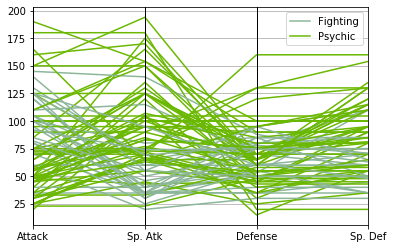

In [29]:
import pandas as pd
from pandas.plotting import parallel_coordinates
def create():
    #Get type1,attacj,sp.Atk, Defense, sp.Def column from all rows where type 1 is "pshycic" or "Fighting"
    p = pokemon[(pokemon['Type 1'].isin(["Psychic", "Fighting"]))]\
         .loc[:, ['Type 1', 'Attack', 'Sp. Atk', 'Defense', 'Sp. Def']]
    
    #print(p)
    #print(type(p))
    parallel_coordinates(p, 'Type 1')
    return 
create()

### 14. Create a swarmplot using "Generation" and "Defense" marking "Legendary" as hue and with any palette of your choice.

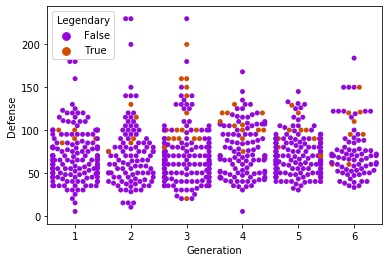

In [17]:
import seaborn as sns
def create():
    sns.swarmplot(x="Generation", y="Defense", hue="Legendary", palette="gnuplot", data=pokemon)
    return None
create()

### 15. Create a bokeh plot using Attack and Total keeping names as the categorical variables.

In [18]:
# Bokeh packages
from bokeh.io import output_file,show,output_notebook,push_notebook
from bokeh.plotting import *
from bokeh.models import ColumnDataSource,HoverTool,CategoricalColorMapper,Slider
from bokeh.layouts import row,column,gridplot,widgetbox
from bokeh.models.widgets import Tabs,Panel
output_notebook()

Loading BokehJS ...

In [19]:
from IPython.html.widgets import interact
data = pokemon.set_index("Generation")
x = data.loc[1].Attack
y = data.loc[1].Total
output_notebook()

C:\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Loading BokehJS ...

In [20]:
# initial source
# 
source = ColumnDataSource(data={
    "x": data.loc[1].Attack,
    "y": data.loc[1].Total,
    "Name" : data.loc[1].Name,
    "HP" : data.loc[1].HP,
        "Legendary" : data.loc[1].Legendary
})
# color map
factors = data.Name.unique().tolist()
colors = ["red","green","blue","black","orange","brown","grey","purple","yellow","cyan","pink","peru"]
color_mapper = CategoricalColorMapper(factors=factors,palette=colors)

# hover tool
hover = HoverTool(tooltips = [("Name of Pokemon","@Name"),("Legendary pokemon","@Legendary"),("HP of pokemon","@HP")])

# plotting
plot=figure(title ="Pokemon",tools=[hover,"crosshair","pan","box_zoom"])
plot.circle("x","y",source=source,color=dict(field="Name", transform=color_mapper), legend='Name',hover_color ="red")

# this is different from what we learn up to now.
# update method: When slider is changed or when different value from drop down tool is chosen this method is called.
# In this method x and y axis are updated from drop dawn value and year is updated from slider value.
def update(x_axis ,y_axis,Generation=1):
    c1 = x_axis
    c2 = y_axis
    new_data = {
        'x'       : data.loc[Generation,c1],
        'y'       : data.loc[Generation,c2],
        "Name"    : data.loc[Generation].name,
        "HP"  : data.loc[Generation].HP,
        "Legendary"  : data.loc[Generation].Legendary
    }
    source.data = new_data
    plot.xaxis.axis_label = c1
    plot.yaxis.axis_label = c2
    push_notebook()  # this push method is vital for this update method
    
show(plot,notebook_handle=True) 


C:\Anaconda3\lib\site-packages\bokeh\models\mappers.py:140: UserWarning: Palette length does not match number of factors. ['BlastoiseMega Blastoise', 'Caterpie', 'Metapod', 'Butterfree', 'Weedle', 'Kakuna', 'Beedrill', 'BeedrillMega Beedrill', 'Pidgey', 'Pidgeotto', 'Pidgeot', 'PidgeotMega Pidgeot', 'Rattata', 'Raticate', 'Spearow', 'Fearow', 'Ekans', 'Arbok', 'Pikachu', 'Raichu', 'Sandshrew', 'Sandslash', 'Nidoran♀', 'Nidorina', 'Nidoqueen', 'Nidoran♂', 'Nidorino', 'Nidoking', 'Clefairy', 'Clefable', 'Vulpix', 'Ninetales', 'Jigglypuff', 'Wigglytuff', 'Zubat', 'Golbat', 'Oddish', 'Gloom', 'Vileplume', 'Paras', 'Parasect', 'Venonat', 'Venomoth', 'Diglett', 'Dugtrio', 'Meowth', 'Persian', 'Psyduck', 'Golduck', 'Mankey', 'Primeape', 'Growlithe', 'Arcanine', 'Poliwag', 'Poliwhirl', 'Poliwrath', 'Abra', 'Kadabra', 'Alakazam', 'AlakazamMega Alakazam', 'Machop', 'Machoke', 'Machamp', 'Bellsprout', 'Weepinbell', 'Victreebel', 'Tentacool', 'Tentacruel', 'Geodude', 'Graveler', 'Golem', 'Ponyta',

In [21]:
from bokeh.plotting import Figure,figure, output_file, show, output_notebook
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, CustomJS, Slider, HoverTool
output_notebook()

plot = figure(plot_width=300, plot_height=300)
plot.circle(x=[1,2,3], y=[4,5,6], size=20,
                  color="#FB8072", fill_alpha=0.2, line_width=2)
slider = Slider(start=.1, end=1., value=.2, step=.1, title="Battle")

show(plot)

Loading BokehJS ...

In [22]:
source=ColumnDataSource(dict(
    
x=pokemon[pokemon['Type 1']=='Grass'].Attack.tolist(),
y=pokemon[pokemon['Type 1']=='Grass'].Defense.tolist(),
speed=pokemon[pokemon['Type 1']=='Grass'].Speed.tolist(),
generation=pokemon[pokemon['Type 1']=='Grass'].Generation.tolist(),
))

plot = Figure(plot_width=900, plot_height=700,
              tools=[HoverTool(tooltips='@generation',show_arrow=False)],
              x_axis_label='Strength',y_axis_label='Vision')


unit_list = pokemon.Name.unique().tolist()

plot.square(x='x', y='y', fill_alpha=5, source=source,
            color='green', 
            legend='types')
plot.legend.location = 'top_right'

In [23]:
from bokeh.io import push_notebook

def update_plot(number):
    types = ['fire', 'rock', 'psychic', 'grass', 'water', 'normal', 'bug', 'electric', 'ground', 'fairy', 'fighting', 'ghost', 'ice', 'dragon', 'steel','dark']
    new_data=dict(
        x=pokemon[pokemon['Type 1']=='Grass'].Attack.tolist(),
        y=pokemon[pokemon['Type 1']=='Grass'].Defense.tolist(),
        speed=pokemon[pokemon['Type 1']=='Grass'].Speed.tolist(),
        generation=pokemon[pokemon['Type 1']=='Grass'].Generation.tolist(),
    )
    source.data=new_data
    push_notebook()


In [24]:
from ipywidgets import interact
interact(update_plot,number=(0,15,1))
show(plot,notebook_handle=True)

interactive(children=(IntSlider(value=7, description='number', max=15), Output()), _dom_classes=('widget-inter…